In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
#warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from sklearn.metrics import mean_squared_error

import pickle
import simplejson as json

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'
plt.rcParams["figure.figsize"] = [16,9]

pd.options.display.max_columns = 150

df = pd.read_csv("/users/akuppam/documents/Hprog/Py/rnb1015_2.csv")
df.head(5)

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
0,1/1/16,AMR,NotPaid,1256288,6043,66022,6071,571,5500,485968.08000,144695.894200,10242216
1,1/1/16,AMR,Paid,189297,1092,11806,743,2,741,0.00000,14138.809600,2133795
2,1/1/16,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696
3,1/1/16,UK,Paid,55934,88,2749,61,1,60,0.00000,815.336426,890424
4,1/1/16,CE,NotPaid,200786,573,9250,435,31,404,40490.73159,12016.782410,3062480


In [2]:
df = df.loc[(df['region'] == 'UK') & (df['marketing'] == 'NotPaid')]
df = df[~(df['nb'] < 0)]
df.describe()

,visits,br,inq,gb,cb,nb,ss,ts,listings
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1.019000e+03
mean,208007.236506,874.540726,5669.378803,738.975466,97.000000,641.975466,64354.344591,67877.867010,4.132623e+06
std,49970.872125,321.850987,3230.824083,272.000936,42.682245,247.541682,51522.802513,43294.630309,6.174129e+05
min,65597.000000,143.000000,659.000000,114.000000,17.000000,97.000000,-32805.469450,-3355.851410,2.914890e+05
25%,180259.000000,655.000000,2768.500000,567.500000,68.000000,491.500000,33014.387520,36549.154035,4.080312e+06
50%,210091.000000,832.000000,5219.000000,704.000000,91.000000,605.000000,48819.573470,66097.854240,4.196176e+06
75%,239734.000000,1003.000000,7682.000000,823.000000,118.500000,711.000000,74321.636300,88053.269915,4.391588e+06
max,423613.000000,2845.000000,18841.000000,2257.000000,477.000000,2109.000000,540698.107300,279106.547400,4.838688e+06


In [3]:
df.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
2,1/1/16,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696
12,1/2/16,UK,NotPaid,230068,500,11385,484,33,451,88212.13002,9777.677209,3544800
22,1/3/16,UK,NotPaid,287058,717,14407,724,42,682,88985.55523,12676.852970,3543248
32,1/4/16,UK,NotPaid,283661,667,14891,754,82,672,266172.54600,14121.575680,3547232
42,1/5/16,UK,NotPaid,277621,664,13854,780,75,705,256567.41390,14941.685160,3526928


In [4]:
df.index = pd.to_datetime(df.date)

In [5]:
df.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
date,,,,,,,,,,,,
2016-01-01,1/1/16,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696
2016-01-02,1/2/16,UK,NotPaid,230068,500,11385,484,33,451,88212.13002,9777.677209,3544800
2016-01-03,1/3/16,UK,NotPaid,287058,717,14407,724,42,682,88985.55523,12676.852970,3543248
2016-01-04,1/4/16,UK,NotPaid,283661,667,14891,754,82,672,266172.54600,14121.575680,3547232
2016-01-05,1/5/16,UK,NotPaid,277621,664,13854,780,75,705,256567.41390,14941.685160,3526928


In [9]:
df = pd.read_csv("/users/akuppam/documents/Hprog/Py/rnb1015_2.csv")
df = df.loc[(df['region'] == 'UK') & (df['marketing'] == 'NotPaid')]
df = df[~(df['nb'] < 0)]
df.describe()
df.index = pd.to_datetime(df.date)
cols = ["nb"]
df = df[cols]
df.columns = ['y']
df.head()

,y
date,
2016-01-01,403
2016-01-02,451
2016-01-03,682
2016-01-04,672
2016-01-05,705


In [12]:
# SARIMA Model
# Not looping thro' every x in X
# This works - do a wider grid search
import warnings
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def evaluate_sarima_model(X, order, sorder):
    # make predictions
    predictions = list()
    model = sm.tsa.statespace.SARIMAX(series,order=order,
                                      seasonal_order=sorder,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
    model_fit = model.fit(transparams=True)
    predictions = model_fit.predict(start=1, end=1019, dynamic=False)
    yhat = model_fit.forecast(442)
    sarima_series = predictions.append(yhat)
    # calculate out of sample error
    error = mean_squared_error(series, predictions)
    print('error = ', error)
    return error

def evaluate_sarima_params(dataset, p_values, d_values, q_values, P_values, D_values, Q_values):
    dataset = dataset.astype('float32')
    best_score, best_params, best_seasonal_params = float("inf"), None, None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            order = (p,d,q)
                            sorder = (P,D,Q,m)
                            try:
                                mse = evaluate_sarima_model(dataset, order, sorder)
                                if mse < best_score:
                                    best_score, best_params, best_seasonal_params = mse, order, sorder
                                print('SARIMA %s %s MSE=%.3f' % (order, sorder, mse))
                            except:
                                continue
    print('Best SARIMA %s %s MSE=%.3f' % (best_params, best_seasonal_params, best_score))
    #model_params = [p,d,q]
    #model_seasonal_params = [P,D,Q]
    print("best order & sorder =", best_params, best_seasonal_params)
    with open('model_params.json','w') as out_params:
        json.dump(best_params, out_params)
    with open('model_seasonal_params.json','w') as out_seasonal_params:
        json.dump(best_seasonal_params, out_seasonal_params)

# load dataset
df.index = pd.to_datetime(df.date)
cols = ["nb"]
y = df[cols]
series = y['nb']
#series = [2,5,8,9,3,5,9,1,4,5,8,9]
#df = pd.DataFrame(np.random.randint(0,30,size=50),
#                  columns=["Random"],
#                  index=pd.date_range("20180101", periods=50))
#series = df['Random']

# evaluate parameters
p_values = range(0, 2)
d_values = range(0, 1)
q_values = range(0, 2)
P_values = range(0, 2)
D_values = range(0, 1)
Q_values = range(0, 2)
m = 7

import warnings
warnings.filterwarnings("ignore")

evaluate_sarima_params(series.values, p_values, d_values, q_values, P_values, D_values, Q_values)

# select the best set of p,d,q
with open('model_params.json') as json_file:
    out_params = json.load(json_file)
p = out_params[0]
d = out_params[1]
q = out_params[2]

# select the best set of P,D,Q
with open('model_seasonal_params.json') as json_file:
    out_seasonal_params = json.load(json_file)
P = out_seasonal_params[0]
D = out_seasonal_params[1]
Q = out_seasonal_params[2]
#m = out_seasonal_params[3]

# apply model
model = sm.tsa.statespace.SARIMAX(series,
                                  order=(p,d,q),
                                  seasonal_order=(P,D,Q,m),
                                  enforce_stationarity=True,
                                  enforce_invertibility=True)
model_fit = model.fit(transparams=True)
print(model_fit.summary())

pred_fcst = model_fit.predict(start=1, end=1019, dynamic=False)
sarima_forecast = model_fit.forecast(442)
sarima_series = pred_fcst.append(sarima_forecast)

error =  473349.2492639843
SARIMA (0, 0, 0) (0, 0, 0, 7) MSE=473349.249
error =  160613.67457470103
SARIMA (0, 0, 0) (0, 0, 1, 7) MSE=160613.675
error =  25195.419933730776
SARIMA (0, 0, 0) (1, 0, 0, 7) MSE=25195.420
error =  25208.95700850225
SARIMA (0, 0, 0) (1, 0, 1, 7) MSE=25208.957
error =  142071.28585315341
SARIMA (0, 0, 1) (0, 0, 0, 7) MSE=142071.286
error =  67825.32235627675
SARIMA (0, 0, 1) (0, 0, 1, 7) MSE=67825.322
error =  17001.04936520419
SARIMA (0, 0, 1) (1, 0, 0, 7) MSE=17001.049
error =  16069.972341029372
SARIMA (0, 0, 1) (1, 0, 1, 7) MSE=16069.972
error =  120.43698494307559
SARIMA (1, 0, 0) (0, 0, 0, 7) MSE=120.437
error =  1476.053247349085
SARIMA (1, 0, 0) (0, 0, 1, 7) MSE=1476.053
error =  3396.998988732902
SARIMA (1, 0, 0) (1, 0, 0, 7) MSE=3396.999
error =  5729.503401566067
SARIMA (1, 0, 0) (1, 0, 1, 7) MSE=5729.503
error =  3014.2118573213943
SARIMA (1, 0, 1) (0, 0, 0, 7) MSE=3014.212
error =  4909.311170398936
SARIMA (1, 0, 1) (0, 0, 1, 7) MSE=4909.311
erro

In [13]:
# Two functions similar to ARIMA
# Loop thro' every X (should give the same result or similar - see SARIMA_grid_search-Copy4.ipynb)
# This modifies yhat, predictions, history calcs
import warnings
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def evaluate_sarima_model(X, order, sorder):
    history = [x for x in X]
    # make predictions
    predictions = list()
    for t in range(len(X)):
        model = sm.tsa.statespace.SARIMAX(series,order=order,
                                  seasonal_order=sorder,
                                  enforce_stationarity=True,
                                  enforce_invertibility=True)
        model_fit = model.fit(transparams=True)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(X[t])
    # calculate out of sample error
    error = mean_squared_error(series, predictions)
    print('error = ', error)
    return error

def evaluate_sarima_params(dataset, p_values, d_values, q_values, P_values, D_values, Q_values):
    dataset = dataset.astype('float32')
    best_score, best_params, best_seasonal_params = float("inf"), None, None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            order = (p,d,q)
                            sorder = (P,D,Q,m)
                            try:
                                mse = evaluate_sarima_model(dataset, order, sorder)
                                if mse < best_score:
                                    best_score, best_params, best_seasonal_params = mse, order, sorder
                                print('SARIMA %s %s MSE=%.3f' % (order, sorder, mse))
                            except:
                                continue
    print('Best SARIMA %s %s MSE=%.3f' % (best_params, best_seasonal_params, best_score))
    #model_params = [p,d,q]
    #model_seasonal_params = [P,D,Q]
    print("best order & sorder =", best_params, best_seasonal_params)
    with open('model_params.json','w') as out_params:
        json.dump(best_params, out_params)
    with open('model_seasonal_params.json','w') as out_seasonal_params:
        json.dump(best_seasonal_params, out_seasonal_params)

# load dataset
df.index = pd.to_datetime(df.date)
cols = ["nb"]
y = df[cols]
series = y['nb']

# evaluate parameters
p_values = range(0, 2)
d_values = range(0, 1)
q_values = range(0, 2)
P_values = range(0, 2)
D_values = range(0, 1)
Q_values = range(0, 2)
m = 7

import warnings
warnings.filterwarnings("ignore")

evaluate_sarima_params(series.values, p_values, d_values, q_values, P_values, D_values, Q_values)

# select the best set of p,d,q
with open('model_params.json') as json_file:
    out_params = json.load(json_file)
p = out_params[0]
d = out_params[1]
q = out_params[2]

# select the best set of P,D,Q
with open('model_seasonal_params.json') as json_file:
    out_seasonal_params = json.load(json_file)
P = out_seasonal_params[0]
D = out_seasonal_params[1]
Q = out_seasonal_params[2]
#m = out_seasonal_params[3]

# apply model
model = sm.tsa.statespace.SARIMAX(series,
                                  order=(p,d,q),
                                  seasonal_order=(P,D,Q,m),
                                  enforce_stationarity=True,
                                  enforce_invertibility=True)
model_fit = model.fit(transparams=True)
print(model_fit.summary())

pred_fcst = model_fit.predict(start=1, end=1019, dynamic=False)
sarima_forecast = model_fit.forecast(442)
sarima_series = pred_fcst.append(sarima_forecast)

error =  473349.2492639843
SARIMA (0, 0, 0) (0, 0, 0, 7) MSE=473349.249
error =  262630.93347710633
SARIMA (0, 0, 0) (0, 0, 1, 7) MSE=262630.933
error =  74616.85049070264
SARIMA (0, 0, 0) (1, 0, 0, 7) MSE=74616.850
error =  75408.27349865956
SARIMA (0, 0, 0) (1, 0, 1, 7) MSE=75408.273
error =  225391.79174460145
SARIMA (0, 0, 1) (0, 0, 0, 7) MSE=225391.792
error =  151122.2553594891
SARIMA (0, 0, 1) (0, 0, 1, 7) MSE=151122.255
error =  71047.89297018608
SARIMA (0, 0, 1) (1, 0, 0, 7) MSE=71047.893
error =  69565.88147698727
SARIMA (0, 0, 1) (1, 0, 1, 7) MSE=69565.881
error =  64295.03440317639
SARIMA (1, 0, 0) (0, 0, 0, 7) MSE=64295.034
error =  64864.766100925284
SARIMA (1, 0, 0) (0, 0, 1, 7) MSE=64864.766
error =  66033.13127242005
SARIMA (1, 0, 0) (1, 0, 0, 7) MSE=66033.131
error =  69365.95665689465
SARIMA (1, 0, 0) (1, 0, 1, 7) MSE=69365.957
error =  63999.20393137108
SARIMA (1, 0, 1) (0, 0, 0, 7) MSE=63999.204
error =  67557.61789674005
SARIMA (1, 0, 1) (0, 0, 1, 7) MSE=67557.618

In [ ]:
sarima_series.to_csv("sarima_series-copy4.csv")

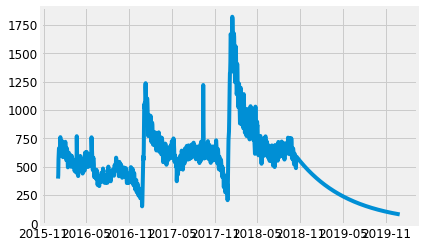

In [14]:
plt.plot(sarima_series)

In [18]:
    def SarimaFxn(df, fcstdays):

        series = df['y']
    
        # evaluate parameters
        p_values = range(0, 2)
        d_values = range(0, 2)
        q_values = range(0, 2)
        P_values = range(0, 2)
        D_values = range(0, 2)
        Q_values = range(0, 2)
        m = 7 #weekly seasonality
    
        fcstdays = 365
    
        best_score, best_params, best_seasonal_params = float("inf"), None, None
        for p in p_values:
            for d in d_values:
                for q in q_values:
                    for P in P_values:
                        for D in D_values:
                            for Q in Q_values:
                                order = (p,d,q)
                                sorder = (P,D,Q,m)
                                #try:
                                mse = evaluate_sarima_model(series, order, sorder, fcstdays)
                                if mse < best_score:
                                    best_score, best_params, best_seasonal_params = mse, order, sorder
                                #print('SARIMA %s %s MSE=%.3f' % (order, sorder, mse))
                                #except:
                                #    continue
        #print('Best SARIMA %s %s MSE=%.3f' % (best_params, best_seasonal_params, best_score))
        #print('Best Params: ', best_params)
    
    
        # apply model
        model = sm.tsa.statespace.SARIMAX(series,
                                          order=(best_params[0],best_params[1],best_params[2]),
                                          seasonal_order=(best_seasonal_params[0],best_seasonal_params[1],best_seasonal_params[2],m),
                                          enforce_stationarity=True,
                                          enforce_invertibility=True)
        model_fit = model.fit(transparams=True)
        print(model_fit.summary())
    
        pred_fcst = model_fit.predict(start=0, end=len(df['y'])-1, dynamic=False)
        sarima_forecast = model_fit.forecast(fcstdays)
        sarima_series = pred_fcst.append(sarima_forecast)
        sarima_series.to_csv('sarima_series.csv')
        return sarima_series
        #return pred_fcst, sarima_forecast
        #return pred_fcst
        #return arima_forecast[0]
        #return af

    
    def evaluate_sarima_model(X, order, sorder, fcstdays):
        # make predictions
        predictions = list()
        model = sm.tsa.statespace.SARIMAX(X,order=order,
                                          seasonal_order=sorder,
                                          enforce_stationarity=True,
                                          enforce_invertibility=True)
        model_fit = model.fit(transparams=True)
        predictions = model_fit.predict(start=0, end=len(X)-1, dynamic=False)
        yhat = model_fit.forecast(fcstdays)    
        # calculate out of sample error
        error = mean_squared_error(X, predictions)
        print('error = ', error)
        return error
    
    

In [19]:
SarimaFxn(df, 365)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` in

error =  473349.2492639843
error =  158726.80138897942
error =  21897.033366045143


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  21884.131841966348
error =  21689.045008094356
error =  21663.114469865388


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  21885.64553041148
error =  20519.454125117903
error =  148353.7116792477


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` in

error =  71559.31872190694
error =  17651.229058727946


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  17190.345313168644
error =  16142.88915044267


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  15699.815708294069


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  17288.98289935473


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  16027.319022662188
error =  14901.615309126595
error =  12947.520026472474
error =  16755.664296198185


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` in

error =  10405.832730211312
error =  12080.86281156166
error =  10339.307624202078
error =  13510.961695218828


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  10202.987117961176
error =  13878.411624976743


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` in

error =  11203.646010379354
error =  12837.300499586241


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  8762.183948590233
error =  9923.696917979158
error =  8669.172077665575
error =  10793.47474079135


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  8393.96414909419
error =  14789.827707850336


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  12801.60664650629
error =  15520.774610822653


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  11887.600532929608
error =  11848.295944498701


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  9747.486057538988
error =  13851.04231696658


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  11633.898815601977
error =  13853.536672344657


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  11181.536167051738
error =  14361.729371579508


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  10854.578577438017


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  9879.639262303783


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  8537.059138770572


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  12615.312025961874


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  10494.51776178772
error =  14401.446102103122


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  12026.373190893815
error =  13909.216716639208


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  9237.667019196922
error =  10718.281418174896


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  9145.504624910263
error =  11430.76811527303


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  8955.647984028767
error =  12769.695843310812


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  10686.51969820325
error =  12836.542663750244


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  8719.137780384328


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  9784.291645905423


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  8631.348944373669


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  10793.269867022012


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


error =  8397.594486519518


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                 1019
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -5994.640
Date:                           Tue, 20 Nov 2018   AIC                          11997.279
Time:                                   11:26:16   BIC                          12016.954
Sample:                               01-01-2016   HQIC                         12004.753
                                    - 10-15-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5183      0.011    -46.557      0.000      -0.540      -0.497
ar.S.L7        0.2448      0.019     12.835

2016-01-01      0.000000
2016-01-02    401.687361
2016-01-03    450.681295
2016-01-04    680.504967
2016-01-05    672.054968
2016-01-06    704.787073
2016-01-07    672.707346
2016-01-08    851.973863
2016-01-09    712.728155
2016-01-10    881.180035
2016-01-11    854.476748
2016-01-12    852.673506
2016-01-13    745.464644
2016-01-14    691.273495
2016-01-15    636.372625
2016-01-16    582.153873
2016-01-17    831.472336
2016-01-18    779.432579
2016-01-19    723.226698
2016-01-20    651.727868
2016-01-21    587.673745
2016-01-22    570.766804
2016-01-23    587.398544
2016-01-24    808.316115
2016-01-25    724.557754
2016-01-26    641.237770
2016-01-27    679.636189
2016-01-28    650.766952
2016-01-29    621.829087
2016-01-30    629.249672
                 ...    
2019-09-16    355.923164
2019-09-17    296.572247
2019-09-18    270.475307
2019-09-19    235.829176
2019-09-20    189.941346
2019-09-21    196.248042
2019-09-22    393.633750
2019-09-23    350.452971
2019-09-24    291.102054


In [15]:
sarimaS

2016-01-01      0.000000
2016-01-02    401.687361
2016-01-03    450.681295
2016-01-04    680.504967
2016-01-05    672.054968
2016-01-06    704.787073
2016-01-07    672.707346
2016-01-08    851.973863
2016-01-09    712.728155
2016-01-10    881.180035
2016-01-11    854.476748
2016-01-12    852.673506
2016-01-13    745.464644
2016-01-14    691.273495
2016-01-15    636.372625
2016-01-16    582.153873
2016-01-17    831.472336
2016-01-18    779.432579
2016-01-19    723.226698
2016-01-20    651.727868
2016-01-21    587.673745
2016-01-22    570.766804
2016-01-23    587.398544
2016-01-24    808.316115
2016-01-25    724.557754
2016-01-26    641.237770
2016-01-27    679.636189
2016-01-28    650.766952
2016-01-29    621.829087
2016-01-30    629.249672
                 ...    
2019-09-16    355.923164
2019-09-17    296.572247
2019-09-18    270.475307
2019-09-19    235.829176
2019-09-20    189.941346
2019-09-21    196.248042
2019-09-22    393.633750
2019-09-23    350.452971
2019-09-24    291.102054


In [6]:
# load dataset
import os
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import simplejson as json

df = pd.read_csv("/users/akuppam/documents/Hprog/Py/rnb1015_2.csv")
df.head(5)

df = pd.read_csv("/users/akuppam/documents/Hprog/Py/rnb1015_2.csv")
df = df.loc[(df['region'] == 'UK') & (df['marketing'] == 'NotPaid')]
df = df[~(df['nb'] < 0)]
df.describe()
df.index = pd.to_datetime(df.date)
cols = ["nb"]
df = df[cols]
df.columns = ['y']
df.head()

,y
date,
2016-01-01,403
2016-01-02,451
2016-01-03,682
2016-01-04,672
2016-01-05,705
